/tmp/ipykernel_2672/2349878330.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.02, 1, 0.98])


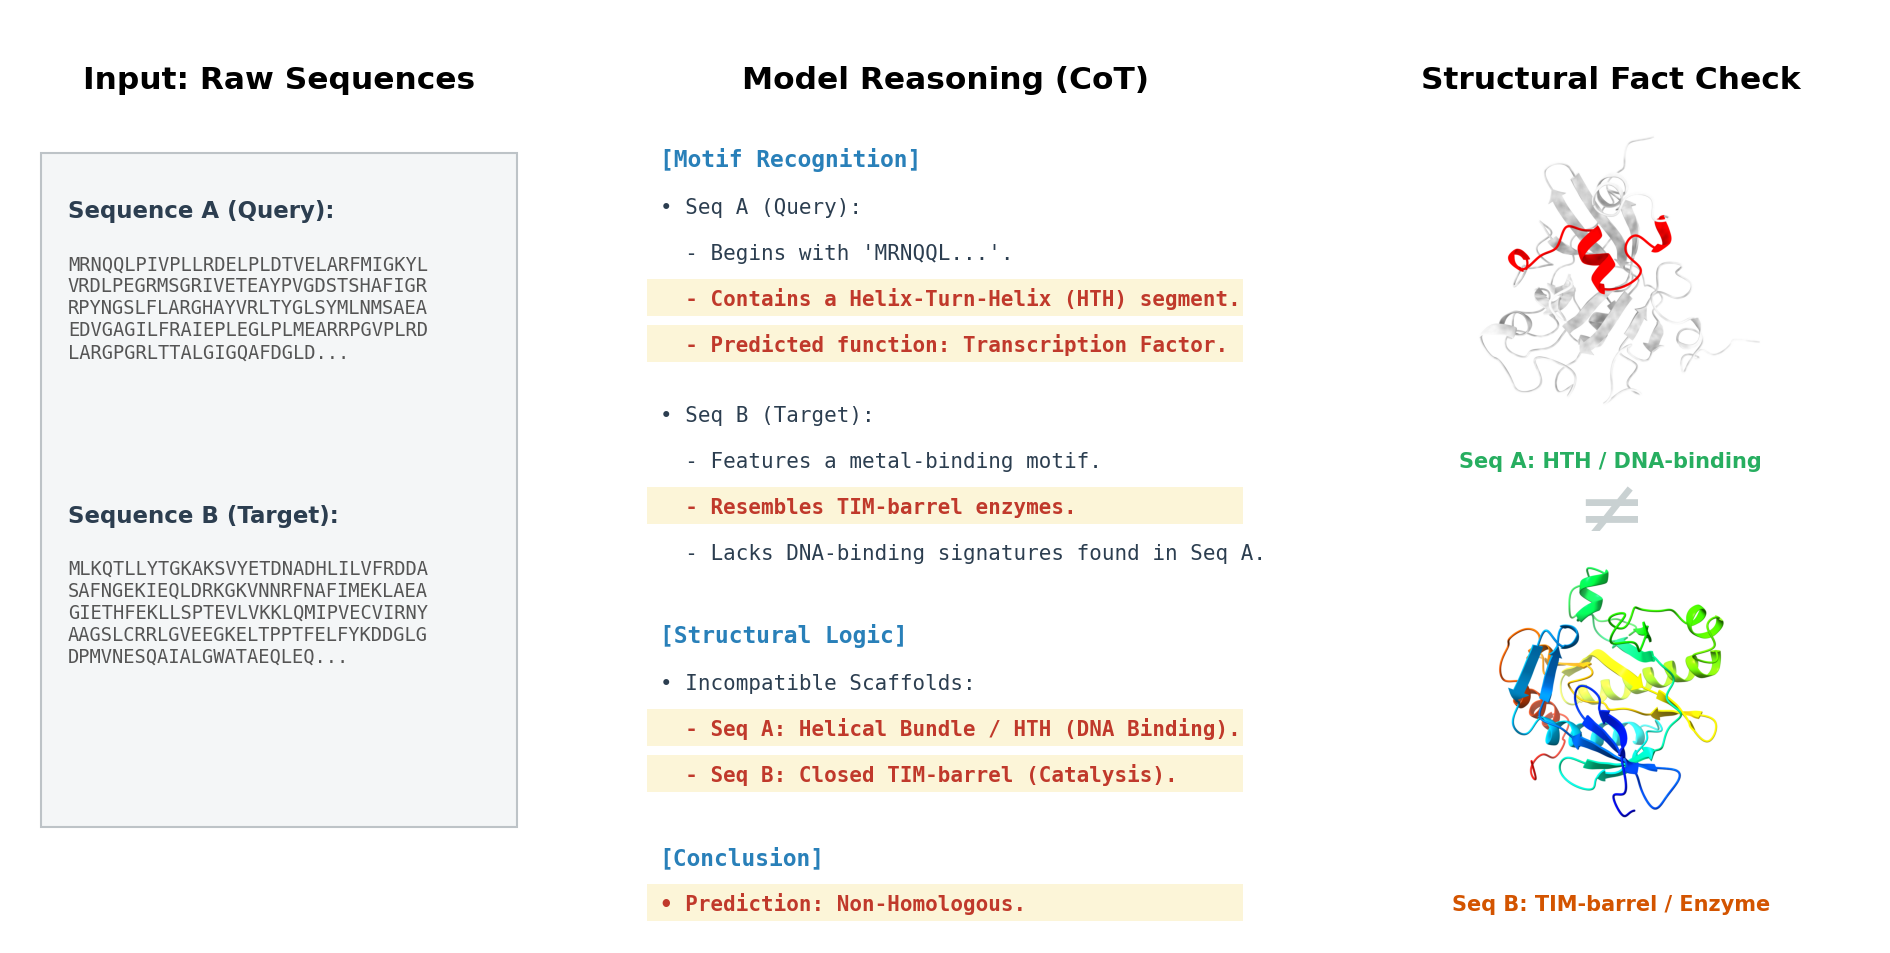

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import textwrap

# ==========================================
# 最终论文版：Figure 5 (Overlap Fixed Ver.)
# ==========================================

# 1. 配置图片路径
img_a_path = "seq_a_render.png"
img_b_path = "seq_b_render.png"

# CoT 文本内容
cleaned_cot_text = """
[Motif Recognition]
• Seq A (Query):
  - Begins with 'MRNQQL...'.
  - Contains a Helix-Turn-Helix (HTH) segment.
  - Predicted function: Transcription Factor.

• Seq B (Target):
  - Features a metal-binding motif.
  - Resembles TIM-barrel enzymes.
  - Lacks DNA-binding signatures found in Seq A.

[Structural Logic]
• Incompatible Scaffolds:
  - Seq A: Helical Bundle / HTH (DNA Binding).
  - Seq B: Closed TIM-barrel (Catalysis).

[Conclusion]
• Prediction: Non-Homologous.
"""

real_seq_a = "MRNQQLPIVPLLRDELPLDTVELARFMIGKYLVRDLPEGRMSGRIVETEAYPVGDSTSHAFIGRRPYNGSLFLARGHAYVRLTYGLSYMLNMSAEAEDVGAGILFRAIEPLEGLPLMEARRPGVPLRDLARGPGRLTTALGIGQAFDGLDLCAGRDLWIGVLERGETLVGVTTRIGLSREMHRPLRFFEPGSAFVSGPRKLLLTPQPGARTRA"
real_seq_b = "MLKQTLLYTGKAKSVYETDNADHLILVFRDDASAFNGEKIEQLDRKGKVNNRFNAFIMEKLAEAGIETHFEKLLSPTEVLVKKLQMIPVECVIRNYAAGSLCRRLGVEEGKELTPPTFELFYKDDGLGDPMVNESQAIALGWATAEQLEQMKVLTYKVNDVLKALFAEGNMILVDFKLEFGVFHDRIVLGDEFSPDGCRLWDKDTKKKLDKDRFRQGLGGVVEAYEEVAARLGVDLSDI"

# 2. 初始化绘图
fig = plt.figure(figsize=(16, 8), dpi=150)
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1.2, 1.0], wspace=0.15)

ax_left = fig.add_subplot(gs[0])
ax_mid = fig.add_subplot(gs[1])
ax_right = fig.add_subplot(gs[2])

# 统一标题高度 (紧贴内容)
TITLE_Y = 0.92

# ==========================================
# Panel 1: Input (Raw Sequences)
# ==========================================
ax_left.axis('off')
ax_left.set_title("Input: Raw Sequences", fontsize=15, fontweight='bold', y=TITLE_Y, pad=0)

rect = patches.Rectangle((0.05, 0.12), 0.9, 0.73, linewidth=1, edgecolor='#bdc3c7', facecolor='#f4f6f7', zorder=-1)
ax_left.add_patch(rect)

ax_left.text(0.1, 0.78, "Sequence A (Query):", fontsize=11, fontweight='bold', color='#2c3e50')
ax_left.text(0.1, 0.74, textwrap.fill(real_seq_a[:150]+"...", width=32),
             fontsize=9, family='monospace', color='#555', va='top')

ax_left.text(0.1, 0.45, "Sequence B (Target):", fontsize=11, fontweight='bold', color='#2c3e50')
ax_left.text(0.1, 0.41, textwrap.fill(real_seq_b[:150]+"...", width=32),
             fontsize=9, family='monospace', color='#555', va='top')


# ==========================================
# Panel 2: Model Reasoning (CoT)
# ==========================================
ax_mid.axis('off')
ax_mid.set_title("Model Reasoning (CoT)", fontsize=15, fontweight='bold', y=TITLE_Y, pad=0)

y_pos = 0.85
highlights = ["Helix-Turn-Helix", "TIM-barrel", "Non-Homologous", "Transcription Factor", "Helical Bundle"]

for line in cleaned_cot_text.strip().split('\n'):
    if not line.strip():
        y_pos -= 0.025
        continue

    fontsize = 10
    color = '#2c3e50'
    weight = 'normal'

    if line.startswith("["):
        weight = 'bold'
        fontsize = 11
        color = '#2980b9'
        y_pos -= 0.015

    is_hl = False
    for kw in highlights:
        if kw in line:
            ax_mid.text(0.05, y_pos, line, fontsize=fontsize, family='monospace', color='#c0392b', fontweight='bold')
            rect = patches.Rectangle((0.03, y_pos-0.012), 0.94, 0.04, linewidth=0, facecolor='#f9e79f', alpha=0.4, zorder=-1)
            ax_mid.add_patch(rect)
            is_hl = True
            break

    if not is_hl:
        ax_mid.text(0.05, y_pos, line, fontsize=fontsize, family='monospace', color=color, fontweight=weight)

    y_pos -= 0.05

# ==========================================
# Panel 3: Structural Fact Check (重叠修复)
# ==========================================
ax_right.axis('off')
ax_right.set_title("Structural Fact Check", fontsize=15, fontweight='bold', y=TITLE_Y, pad=0)

# 上方图片和文字 (稍微上移)
try:
    img_a = mpimg.imread(img_a_path)
    # y: 0.53 -> 0.55
    ax_img_a = ax_right.inset_axes([0.1, 0.55, 0.8, 0.35])
    ax_img_a.imshow(img_a)
    ax_img_a.axis('off')
    # 文字 y: 0.49 -> 0.51
    ax_right.text(0.5, 0.51, "Seq A: HTH / DNA-binding", ha='center', fontsize=10, fontweight='bold', color='#27ae60')
except FileNotFoundError:
    ax_right.text(0.5, 0.7, "[Place 'seq_a_render.png' here]", ha='center', color='red', fontsize=8)

# 下方图片和文字 (稍微下移)
try:
    img_b = mpimg.imread(img_b_path)
    # y: 0.08 -> 0.05
    ax_img_b = ax_right.inset_axes([0.1, 0.09, 0.8, 0.35])
    ax_img_b.imshow(img_b)
    ax_img_b.axis('off')
    # 文字 y: 0.04 -> 0.01
    ax_right.text(0.5, 0.03, "Seq B: TIM-barrel / Enzyme", ha='center', fontsize=10, fontweight='bold', color='#d35400')
except FileNotFoundError:
    ax_right.text(0.5, 0.25, "[Place 'seq_b_render.png' here]", ha='center', color='red', fontsize=8)

# 中间的不等号 (重新定位到中间空隙: 0.46)
ax_right.text(0.5, 0.46, "≠", ha='center', va='center', fontsize=40, color='#95a5a6', alpha=0.5)

# ==========================================
# 最终保存
# ==========================================
plt.tight_layout(rect=[0, 0.02, 1, 0.98])
plt.savefig("qwen3_explain_final_fixed.png", bbox_inches='tight', pad_inches=0.1)
plt.show()